In [1]:
%cd /Users/gwg/local/dmcm
%matplotlib inline

/Users/gwg/local/dmcm


In [2]:
import torch
import random

from   data import GTExConfig, GTExDataset
from   models import CCAAE

In [3]:
cfg = GTExConfig()
cfg.PCCA_Z_DIM = 100

dataset = GTExDataset(cfg)
images = dataset.images.numpy()

path = 'experiments/20181003_shared_z_crossmod/'\
       'gtex_mode-ccaae_latent_dim-100_seed-0_lr-1e-05_BEST/model.pt'
    
state = torch.load(path, map_location={'cuda:0': 'cpu'})
model = CCAAE(cfg)
model.load_state_dict(state)

In [4]:
import random

inds = [-1]

x1_batch = torch.Tensor(128, 3, 128, 128)
x2_batch = torch.Tensor(128, 18659)

for i in range(128):
    r = -1
    while r in inds:
        r = random.randint(0, 2221)

    inds.append(r)
    x1, x2 = dataset[r]
    x1_batch[i] = x1
    x2_batch[i] = x2
    
_, x2_batch_r = model.forward([x1_batch, x2_batch])

torch.save({
    'x2_batch': x2_batch,
    'x2_batch_r': x2_batch_r
}, 'gene_expression_batch.pt')

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = torch.load('gene_expression_batch.pt')
arr1 = data['x2_batch'].detach().numpy()
arr2 = data['x2_batch_r'].detach().numpy()

In [6]:
def subset(mat, mat2, top):
    '''
    top is an integer of how many things we want to keep
    '''
    C  = np.dot(mat.T, mat)
    C2 = np.dot(mat2.T, mat2)
    n,m = C.shape
    
    C_sums = [np.sum(C[i,:]) for i in range(n)]
    
    top_idx  = np.argsort(C_sums)[-top:]
    
    truncated_C  = np.zeros((len(top_idx),len(top_idx)))
    truncated_C2 = np.zeros((len(top_idx),len(top_idx)))
    
    for i in range(top):
        for j in range(top):
            truncated_C[i,j]  = C[top_idx[i],top_idx[j]]
            truncated_C2[i,j] = C2[top_idx[i],top_idx[j]]
            
    return truncated_C, truncated_C2

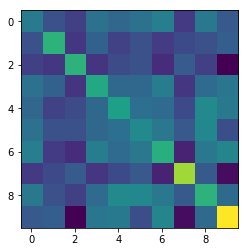

In [9]:
truncated_C, truncated_C2 = subset(arr1, arr2, 10)

plt.imshow(truncated_C)

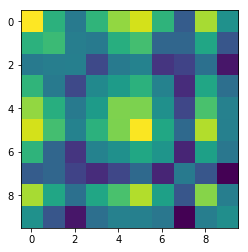

In [10]:

plt.imshow(truncated_C2)